# 2. Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset. a. Perform Data Pre-processing b. Define Model and perform training c. Evaluate Results using confusion matrix

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN input (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode target labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128, validation_split=0.1)





Epoch 1/5


422/422 [==============================] - 20s 39ms/step - loss: 0.3147 - accuracy: 0.9027 - val_loss: 0.0671 - val_accuracy: 0.9800
Epoch 2/5
422/422 [==============================] - 15s 36ms/step - loss: 0.1067 - accuracy: 0.9683 - val_loss: 0.0507 - val_accuracy: 0.9845
Epoch 3/5
422/422 [==============================] - 16s 37ms/step - loss: 0.0758 - accuracy: 0.9770 - val_loss: 0.0411 - val_accuracy: 0.9878
Epoch 4/5
422/422 [==============================] - 15s 37ms/step - loss: 0.0625 - accuracy: 0.9817 - val_loss: 0.0382 - val_accuracy: 0.9877
Epoch 5/5
422/422 [==============================] - 15s 37ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0353 - val_accuracy: 0.9915


313/313 [==============================] - 2s 7ms/step


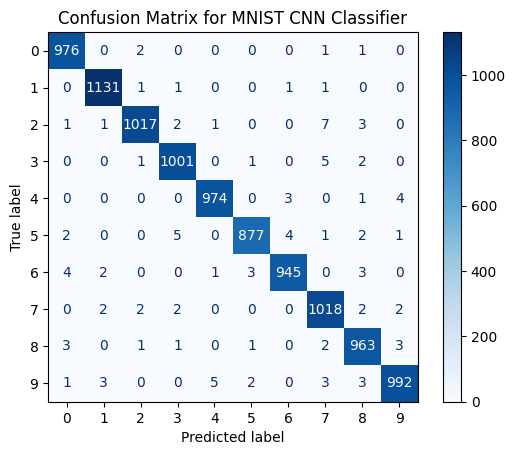

313/313 [==============================] - 3s 8ms/step - loss: 0.0286 - accuracy: 0.9894
Test Accuracy: 98.94%


In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict test data
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for MNIST CNN Classifier")
plt.show()

# Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))


In [4]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_labels, target_names=[str(i) for i in range(10)])
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

